In [1]:
from bs4 import BeautifulSoup 
import requests 

def get_soup_by_link(link):
    response = requests.get(link) 
    return BeautifulSoup(response.text, 'html.parser')
 
def parse_rating(table_movie_rating): 
    try: 
        return table_movie_rating.tbody.tr.td.div.span.text 
    except: 
        return "Unknown" 
    
def parse_genre(table_movie_info): 
    try: 
        return table_movie_info.find('td', {'class': 'genre'}).p.a.text
    except: 
        return "Unknown" 
    
def parse_year(table_movie_info):
    try:
        return table_movie_info.find('td', {'class': 'year'}).a.text
    except:
        return "Unknown"

def parse(table_movie_info, class_name):
    try:
        return table_movie_info.find('td', {'class': class_name}).text
    except:
        return "Unknown"

def parse_min_age(td_with_data):
    try:
        return td_with_data.find('div', {'class': 'title__labels'}).contents[1].text
    except:
        return "Unknown"

def parse_director(td_with_data):
    try:
        return td_with_data.findAll('p', recursive = False)[0].text[10:]
    except:
        return "Unknown"    

def parse_actors(td_with_data):
    try:
        return td_with_data.findAll('p', recursive = False)[1].text[9:]
    except:
        return "Unknown"

main_link = 'https://afisha.tut.by/film/'
soup = get_soup_by_link(main_link)
films_li = soup.findAll('li', {'class': 'lists__li'}) 
links = []
for film_li in films_li: 
    film_links = film_li.findAll('a', {'class': 'name'}) 
    if len(film_links) != 0: 
        link = film_links[0]['href']
        if link.startswith(main_link) and '?utm_source' not in link: 
            links.append(link)

movies = {}
links_amount = len(links)
i = 1
for link in links:
    print(str(i) + " of " + str(links_amount) + ": " + link)
    i = i + 1
    
    soup = get_soup_by_link(link)
    td_with_data = soup.find('td', {'class': 'post b-event-post'}) 
    table_movie_info = td_with_data.find('table', {'class': 'movie_info'}) 
    table_movie_rating = td_with_data.find('table', {'class': 'movie_rating'}) 
    name = td_with_data.h1.string
    
    movies[name] = {}
    movies[name]['link'] = link
    movies[name]['genre'] = parse_genre(table_movie_info)
    movies[name]['year'] = parse_year(table_movie_info)
    movies[name]['country'] = parse(table_movie_info, 'author')
    movies[name]['duration'] = parse(table_movie_info, 'duration')
    movies[name]['end_date'] = parse(table_movie_info, 'date')
    movies[name]['director'] = parse_director(td_with_data) 
    movies[name]['actors'] = parse_actors(td_with_data)
    movies[name]['rating'] = parse_rating(table_movie_rating)
    movies[name]['min_age'] = parse_min_age(td_with_data)

1 of 160: https://afisha.tut.by/film/semeyka-addams/
2 of 160: https://afisha.tut.by/film/terminator-temnye-sudby/
3 of 160: https://afisha.tut.by/film/vernost/
4 of 160: https://afisha.tut.by/film/ditya-pogody/
5 of 160: https://afisha.tut.by/film/robo/
6 of 160: https://afisha.tut.by/film/francuz-2019/
7 of 160: https://afisha.tut.by/film/krugosvetnoe-puteshestvie-elkano-i-magellana/
8 of 160: https://afisha.tut.by/film/izvinite-my-vas-ne-zastali/
9 of 160: https://afisha.tut.by/film/terminator_dark_fate_ru_sub/
10 of 160: https://afisha.tut.by/film/semeyka-addams-sub/
11 of 160: https://afisha.tut.by/film/korotkiy_metr_silent_black/
12 of 160: https://afisha.tut.by/film/kokosha-malenkiy-drakon-priklyucheniya-v-dzhunglyakh/
13 of 160: https://afisha.tut.by/film/dobro-pozhalovat-v-akapulko/
14 of 160: https://afisha.tut.by/film/malefisenta-vladychica-tmy/
15 of 160: https://afisha.tut.by/film/tekst/
16 of 160: https://afisha.tut.by/film/zombilend-kontrolnyy-vystrel/
17 of 160: https:/

In [2]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder.appName("minald").getOrCreate()
sc = spark.sparkContext
pdDF = pd.DataFrame(movies).transpose()
pdDF

,link,genre,year,country,duration,end_date,director,actors,rating,min_age
Семейка Аддамс,https://afisha.tut.by/film/semeyka-addams/,Анимация,2019,"Великобритания, Канада, США",105 минут,В прокате до 13 ноября,"Грег Тирнан, Конрад Вернон","Оскар Айзек, Шарлиз Терон, Хлоя Грейс Морец, Ф...","8,4",6+
Терминатор: Темные судьбы,https://afisha.tut.by/film/terminator-temnye-s...,Боевик,2019,"США, Китай",Unknown,В прокате до 13 декабря,Тим Миллер,"Арнольд Шварценеггер, Маккензи Дэвис, Эдвард Ф...","6,1",Unknown
Верность,https://afisha.tut.by/film/vernost/,Драма,2019,Россия,82 минуты,В прокате до 10 ноября,Нигина Сайфуллаева,"Александр Паль, Евгения Громова, Алексей Агран...","6,8",18+
Дитя погоды,https://afisha.tut.by/film/ditya-pogody/,Анимация,2019,Япония,111 минут,В прокате до 10 ноября,Макото Синкай,"Котаро Дайго, Нана Мори, Сюн Огури, Цубаса Хон...","7,9",12+
Робо,https://afisha.tut.by/film/robo/,Детский/Семейный,2019,Россия,90 минут,В прокате до 13 ноября,Сарик Андреасян,"Даниил Муравьев-Изотов, Владимир Вдовиченков, ...","10,0",6+
...,...,...,...,...,...,...,...,...,...,...
TheatreHD: Гоген,https://afisha.tut.by/film/theatrehd-gogen/,Документальный,Unknown,Unknown,Unknown,В прокате до 24 ноября,Unknown,Unknown,Unknown,Unknown
TheatreHD: Гамлет: Камбербэтч (ENG),https://afisha.tut.by/film/theatrehd_gamlet_ka...,Unknown,Unknown,Великобритания,210 минут,В прокате до 26 ноября,Линдси Тёрнер,"Бенедикт Камбербэтч, Киран Хайндс, Лео Билл, С...","8,5",Unknown
TheatreHD: Леонардо. Вся история,https://afisha.tut.by/film/theatrehd-leonardo-...,Документальный,2019,Великобритания,85 минут,В прокате до 27 ноября,Unknown,Unknown,Unknown,12+
TheatreHD: Настоящая комедия (RU SUB),https://afisha.tut.by/film/theatrehd_nastoyash...,Unknown,2019,Unknown,160 минут,В прокате до 29 ноября,Unknown,Unknown,Unknown,Unknown


In [7]:
movies_df = spark.createDataFrame(pdDF)
movies_df.show()
movies_df.createOrReplaceTempView("all_movies")
movies_age = spark.sql("SELECT MIN_AGE, COUNT(*) AS cnt FROM all_movies GROUP BY MIN_AGE")
movies_age.show()

+--------------------+----------------+----+--------------------+----------+--------------------+--------------------+--------------------+-------+-------+
|                link|           genre|year|             country|  duration|            end_date|            director|              actors| rating|min_age|
+--------------------+----------------+----+--------------------+----------+--------------------+--------------------+--------------------+-------+-------+
|https://afisha.tu...|        Анимация|2019|Великобритания, К...| 105 минут|В прокате до 13 н...|Грег Тирнан, Конр...|Оскар Айзек, Шарл...|    8,4|     6+|
|https://afisha.tu...|          Боевик|2019|          США, Китай|   Unknown|В прокате до 13 д...|          Тим Миллер|Арнольд Шварценег...|    6,1|Unknown|
|https://afisha.tu...|           Драма|2019|              Россия| 82 минуты|В прокате до 10 н...|  Нигина Сайфуллаева|Александр Паль, Е...|    6,8|    18+|
|https://afisha.tu...|        Анимация|2019|              Япония

In [14]:
import pyspark.sql.functions as f

countries_from_rows = spark.sql("SELECT COUNTRY FROM all_movies")
countries = countries_from_rows.select(
  "COUNTRY",
  f.split("COUNTRY", ", ").alias("COUNTRY"),
  f.posexplode(f.split("COUNTRY", ", ")).alias("pos", "_COUNTRY")
  ).select("_COUNTRY")
countries.createOrReplaceTempView("countries")
country_counts = spark.sql("SELECT _COUNTRY, COUNT(*) as cnt FROM countries GROUP BY _COUNTRY ORDER BY _COUNTRY DESC")
country_counts.show()

actors_from_rows = spark.sql("SELECT actors FROM all_movies")
actors = actors_from_rows.select(
  "actors",
  f.split("actors", ", ").alias("actors"),
  f.posexplode(f.split("actors", ", ")).alias("pos", "_actors")
  ).select("_actors")
actors.createOrReplaceTempView("actors")
actors_counts = spark.sql("SELECT _actors, COUNT(*) as cnt FROM actors GROUP BY _actors ORDER BY COUNT(*) DESC")
actors_counts.show()

+-----------+---+
|   _COUNTRY|cnt|
+-----------+---+
|     Япония|  2|
|     Швеция|  2|
|  Швейцария|  1|
|      Чехия|  2|
|        Чад|  1|
|    Франция| 12|
|      Судан|  1|
|        США| 25|
|     Россия| 17|
| Португалия|  1|
|     Польша|  1|
|   Норвегия|  3|
| Нидерланды|  3|
|    Мексика|  3|
| Люксембург|  1|
|     Латвия|  1|
| Кыргызстан|  1|
|Корея Южная|  1|
|      Китай|  4|
|      Катар|  1|
+-----------+---+
only showing top 20 rows

+--------------------+---+
|             _actors|cnt|
+--------------------+---+
|             Unknown| 80|
|           Брюс Дерн|  2|
|        Финн Вулфард|  2|
|    Хлоя Грейс Морец|  2|
|           Ник Кролл|  2|
|        Джон Бернтал|  2|
|      Эдвард Ферлонг|  2|
|         Оскар Айзек|  2|
|     Кассандра Старр|  2|
|      Михаил Ефремов|  2|
|         Бетт Мидлер|  2|
|      Эллисон Дженни|  2|
|      Евгений Ткачук|  2|
|       Наталия Рейес|  2|
|         Мартин Шорт|  2|
|      Линда Хэмилтон|  2|
|Арнольд Шварценеггер|  2|
| 

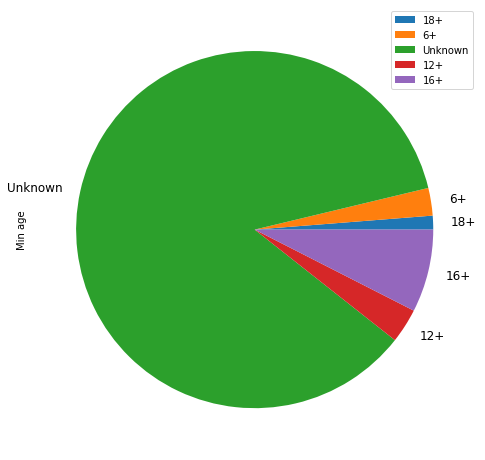

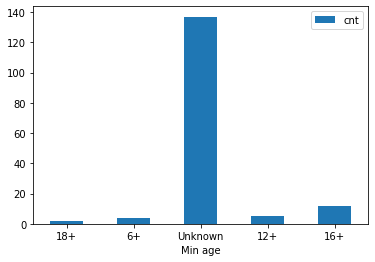

In [38]:
import numpy as np

q_array =  np.array(movies_age.select("CNT").collect())
l_array = np.array(movies_age.select("MIN_AGE").collect())
l = len(q_array)

count_age = []
for i in range(0,l):
    count_age.append(q_array[i][0])
data_age = []
for i in range(0,l):
    data_age.append(l_array[i][0])
    
age_pie = pd.DataFrame({'Min age': count_age}, index = data_age)
age_pie.plot.pie(y='Min age', figsize=(8, 9), legend = True, fontsize = 12)
age_bar = pd.DataFrame({'Min age': data_age, 'cnt': count_age})
age_bar.plot.bar(x = 'Min age', y = 'cnt', rot = 0)

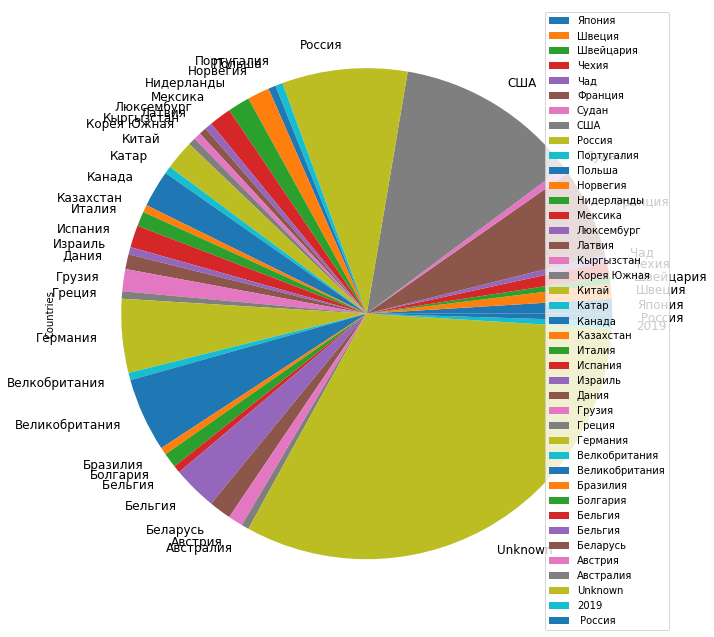

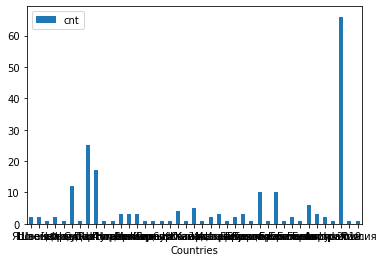

In [35]:
c_q_array =  np.array(country_counts.select("cnt").collect())
countries_array = np.array(country_counts.select("_COUNTRY").collect())
k = len(c_q_array)

count_countries = []
for i in range(0, k):
    count_countries.append(c_q_array[i][0])
data_countries = []
for i in range(0, k):
    data_countries.append(countries_array[i][0])
    
country_pie = pd.DataFrame({'Countries': count_countries}, index = data_countries)
country_pie.plot.pie(y='Countries', figsize=(11, 18), legend = True, fontsize = 12)
country_bar = pd.DataFrame({'Countries': data_countries, 'cnt': count_countries})
country_bar.plot.bar(x = 'Countries', y = 'cnt', rot = 0)

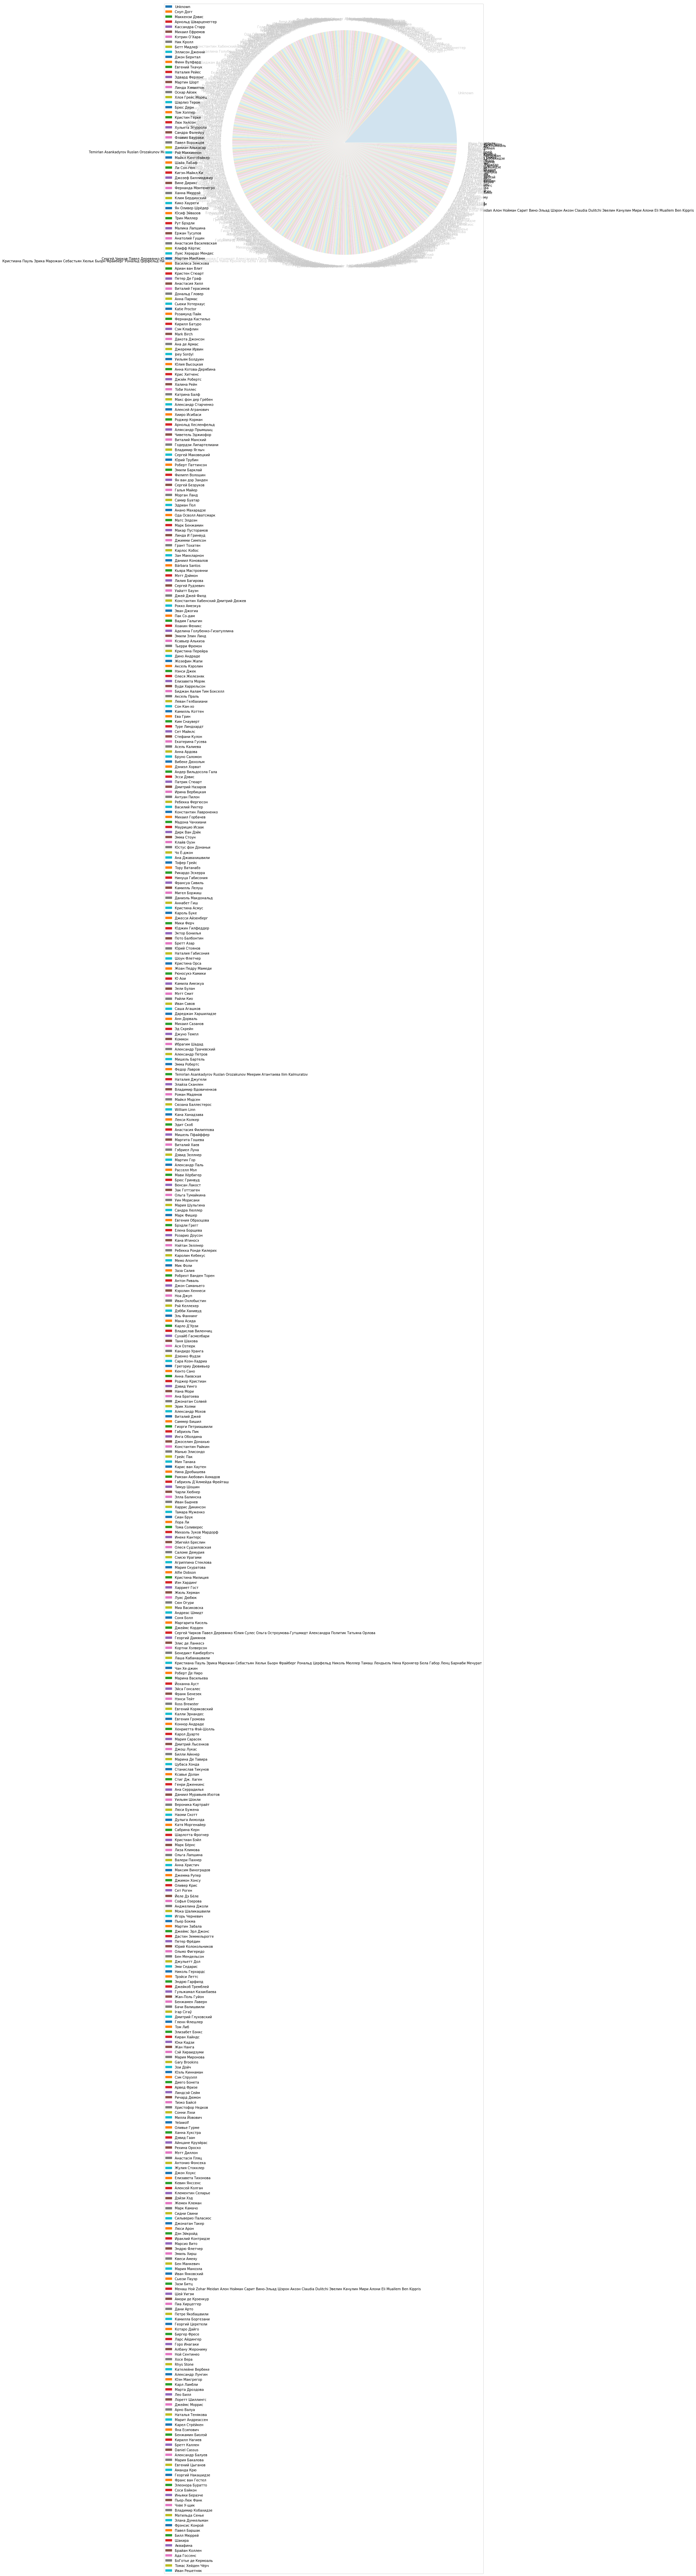

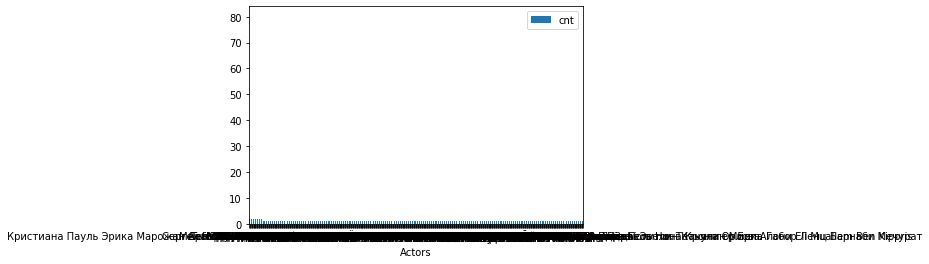

In [36]:
a_q_array =  np.array(actors_counts.select("cnt").collect())
actors_array = np.array(actors_counts.select("_ACTORS").collect())
m = len(a_q_array)

count_actors = []
for i in range(0,m):
    count_actors.append(a_q_array[i][0])
data_actors = []
for i in range(0,m):
    data_actors.append(actors_array[i][0])
    
actors_pie = pd.DataFrame({'Actors': count_actors}, index = data_actors)
actors_pie.plot.pie(y='Actors', figsize=(15, 18))
actors_bar = pd.DataFrame({'Actors': data_actors, 'cnt': count_actors})
actors_bar.plot.bar(x = 'Actors', y = 'cnt', rot = 0)

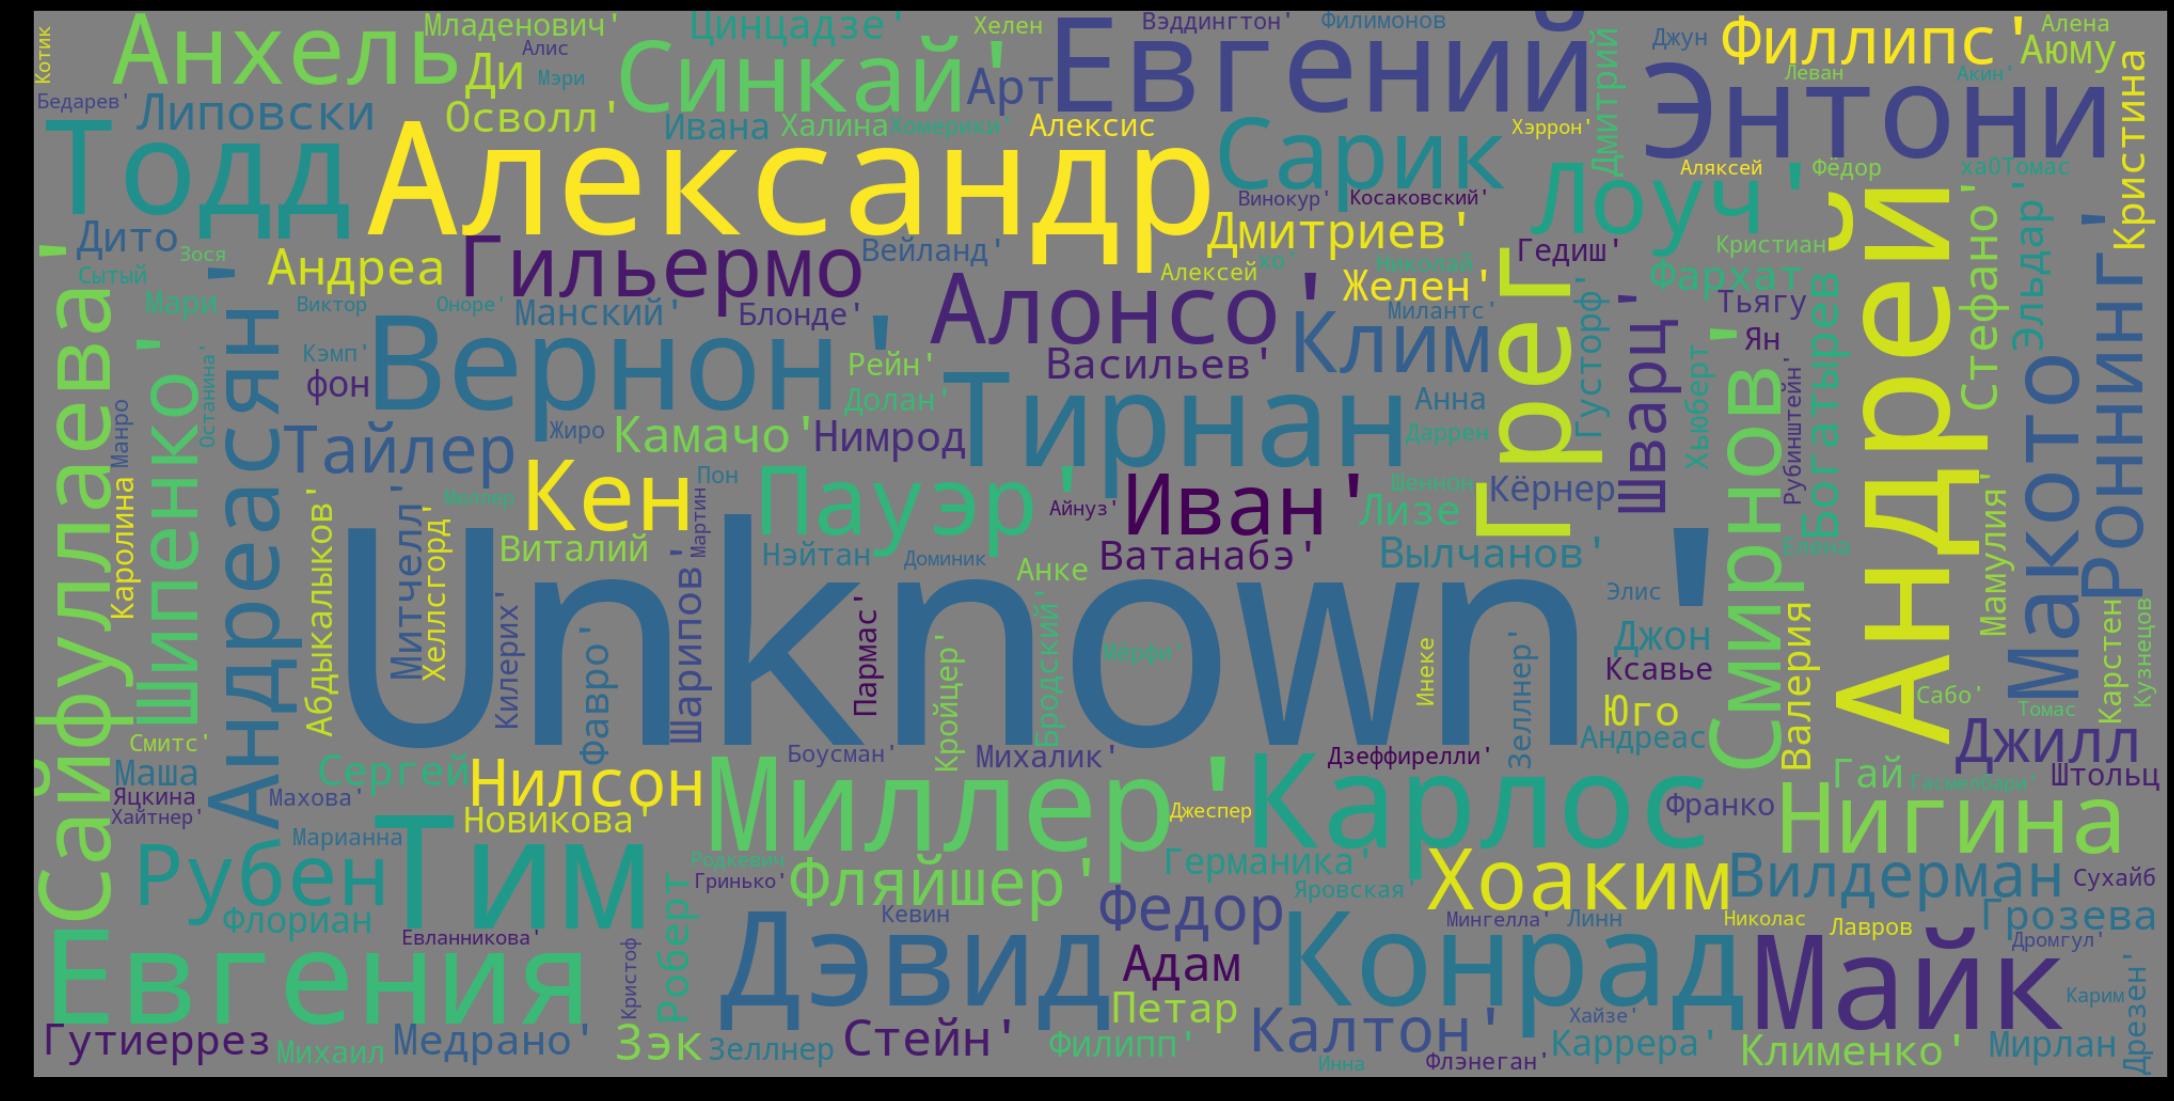

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = pdDF.director.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'gray',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'b')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.tight_layout(pad=0)
plt.show()